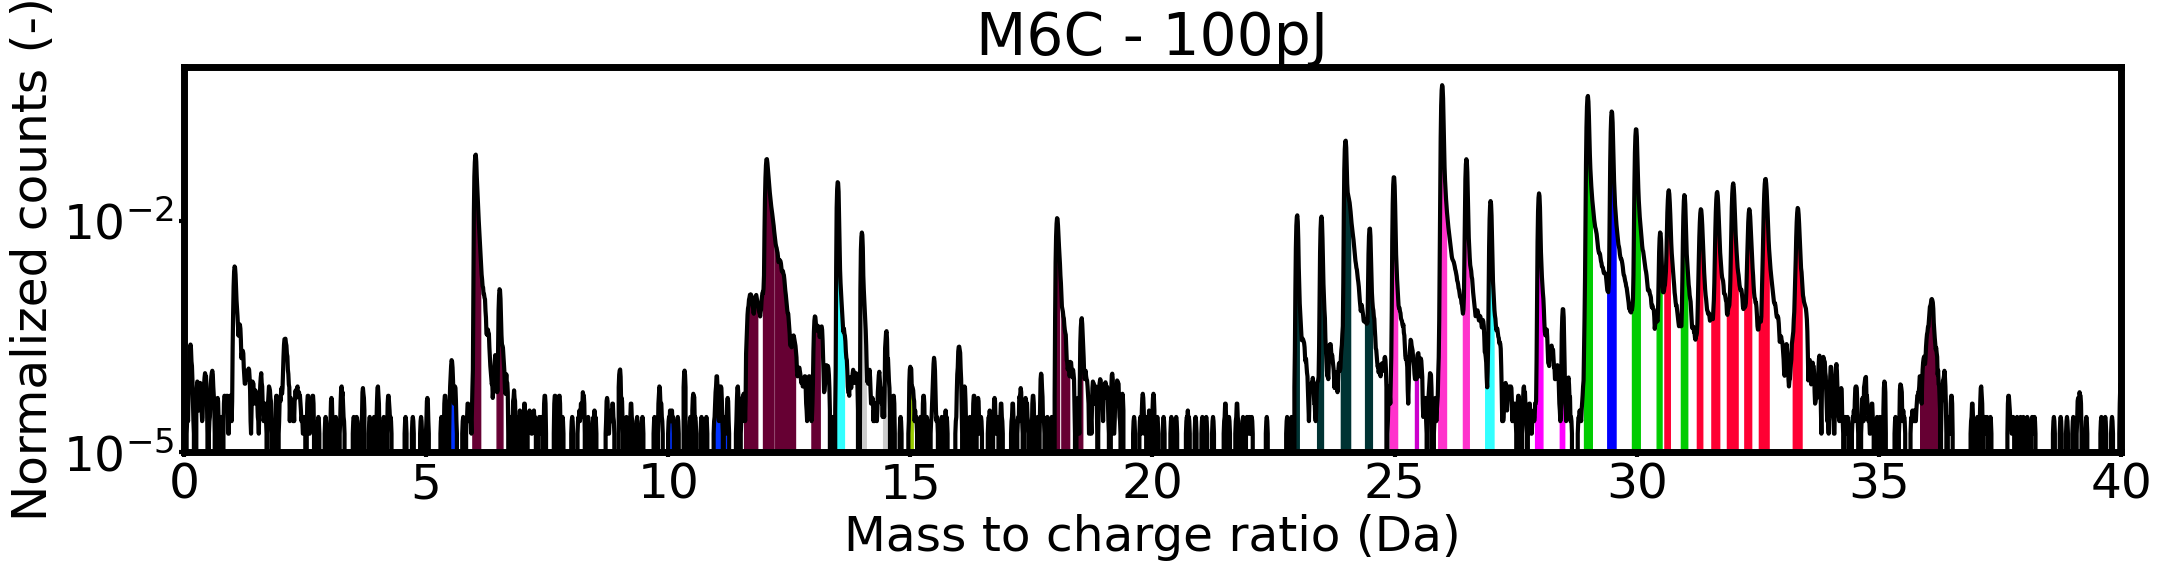

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 12 20:16:23 2021

@author: felixtheska
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

pd.options.mode.chained_assignment = None  # default='warn'

MassSpectra = glob.glob('../test/MassSpectrum*.csv')
RangeFile = '../test/Rangefile.RRNG'


plt.rc('font', size=35)
plt.rc('axes', linewidth=5)
plt.rc('xtick.major', width=3)
plt.rc('ytick.major', width=3)
plt.rc('ytick.minor', width=3)
LineWidth = 3
Format = ".eps"


def Read_in(File_Name):
    Data = pd.read_csv(File_Name,skiprows=1, names = ['MassToChargeRatio','UncorrectedCount','CorrectedCount','BackgroundCount'])
    return Data['MassToChargeRatio'], Data['UncorrectedCount']

def Read_range(File_Name):
    Data = pd.read_csv(File_Name,skiprows=17,sep=' ', names=['mq1', 'mq2', 'volume', 'element', 'color'])
    return Data


def Plot_Series(Series, Name):   
    plt.figure(figsize=(25,5))
    for itr, File in enumerate(Series):
        MassToChargeRatio, Count = Read_in(File)
        NormalizedCount = Count/np.max(Count)
        NormalizedCount = NormalizedCount.rolling(5,win_type='gaussian').mean(std=2)
        plt.plot(MassToChargeRatio, NormalizedCount, label=File.rstrip(".csv"),linewidth=LineWidth,color='black')

        Ranges = Read_range(RangeFile)
        for etr, row in Ranges.iterrows():
            Highlight = Ranges.iloc[etr]            
            Highlight['mq1'] = float(Highlight['mq1'].replace('Range' + str(etr+1) + '=',''))
            MassToChargeRatioHighlight = MassToChargeRatio[(MassToChargeRatio >= Highlight['mq1']) & (MassToChargeRatio <= Highlight['mq2'])]
            NormalizedCountHighlight = NormalizedCount[(MassToChargeRatio >= Highlight['mq1']) & (MassToChargeRatio <= Highlight['mq2'])]
            plt.fill_between(MassToChargeRatioHighlight,NormalizedCountHighlight,color=Highlight['color'].replace('Color:', '#').lower())
        
        plt.title(Name)
        plt.yscale('log')
        plt.xlim([0,40])
        plt.ylim([1e-5,1e0])
        #plt.legend(loc='upper left')
        plt.xlabel("Mass to charge ratio (Da)")
        plt.ylabel("Normalized counts (-)")
    plt.savefig('export/' + Name + Format, bbox_inches="tight")

Plot_Series(MassSpectra, Name='M6C - 100pJ')
